# 3
- Divide the data by region,using one category for Latin America and one category to group all other regions together
- Assess statistical significance of the difference in each of the Happiness’s score components.
- Further, perform all computations necessary to justify that your conclusion is not dependent on normality of your test statistic. 

In [18]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import matplotlib
#from statsmodels.regression.linear_model import OLS
#from statsmodels.tools.tools import add_constant
#from statsmodels.nonparametric.smoothers_lowess import lowess

# new imports for polynomial regresion
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import from the 
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import ttest_ind


In [2]:
# Import data 
df_happiness = pd.read_csv('./Happiness.csv')
df_happiness.head(10)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
5,Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
6,Netherlands,Western Europe,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416
7,New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401
8,Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407
9,Sweden,Western Europe,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254


In [3]:
#set some values for the plots
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(42)

In [6]:
#Divide the data by region,using one category for Latin America and one category to group all other regions together

df_latam = df_happiness[df_happiness["Region"] == 'Latin America and Caribbean' ]

df_world = df_happiness[df_happiness["Region"] != 'Latin America and Caribbean' ]

#get just the happines score

hscore_latam= df_latam.loc[:,"Happiness Score"]
hscore_world = df_world.loc[:,"Happiness Score"]



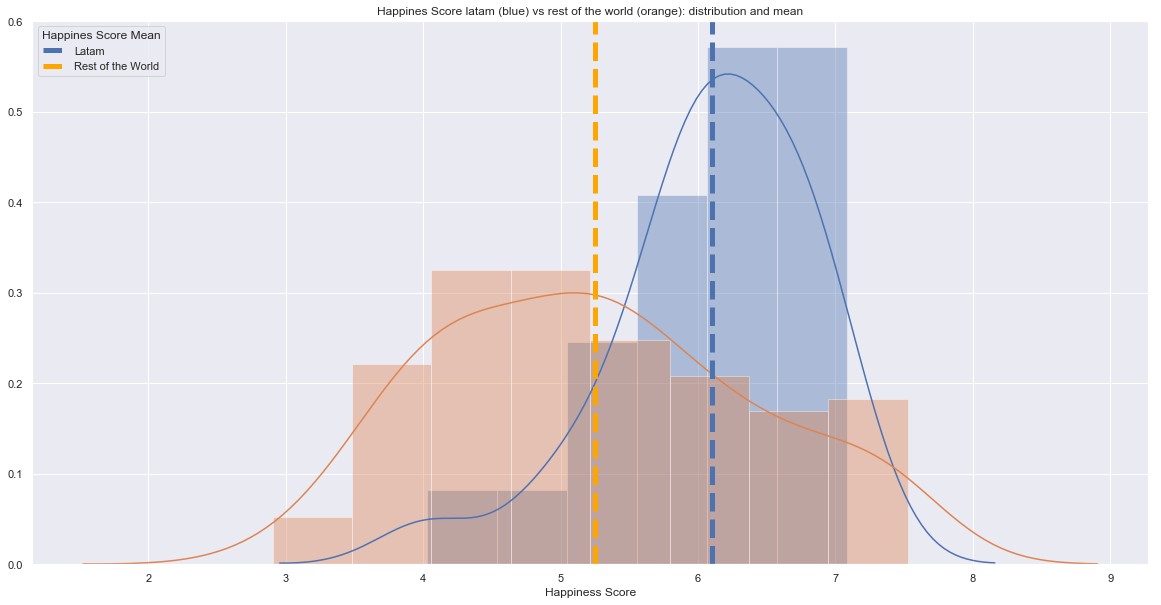

In [42]:
#Assess statistical significance of the difference in each of the Happiness’s score components.


# happines score in latam (blue) vs world (orange) 
plt.figure()
ax1 = sns.distplot(hscore_latam)
ax2 = sns.distplot(hscore_world)
plt.axvline(np.mean(hscore_latam), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(hscore_world), color='orange', linestyle='dashed', linewidth=5)
plt.legend(title='Happines Score Mean', loc='upper left', labels=['Latam','Rest of the World'])
plt.title('Happines Score latam (blue) vs rest of the world (orange): distribution and mean');

In [19]:
def compare_2_groups(arr_1, arr_2, alpha):
    
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')


In [25]:
# Assess statistical significance of the difference in each of the Happiness’s score components.

#level of significance to reject H0 (means are equal)
alpha = 0.05
#fit the t test
tstat, p=  ttest_ind(hscore_latam, hscore_world)
print('T Statistic=%.3f, p=%.3f' % (tstat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')  

T Statistic=3.472, p=0.001
Different distributions (reject H0)


In [32]:
#justify that your conclusion is not dependent on normality of your test statistic.

#get the number of observations for each 
N_latam = hscore_latam.shape[0]
N_world = hscore_world.shape[0]

#boostrap replications
B=1000
latam_means = list()
world_means = list()

for boostrap_ite in range(1,B+1):
    #just resample  take its value and then calculate the mean
    resampled_latam = resample(hscore_latam,n_samples=N_latam)
    resampled_world = resample(hscore_world,n_samples=N_world)
    latam_means.append(resampled_latam.mean())
    world_means.append(resampled_world.mean())
    

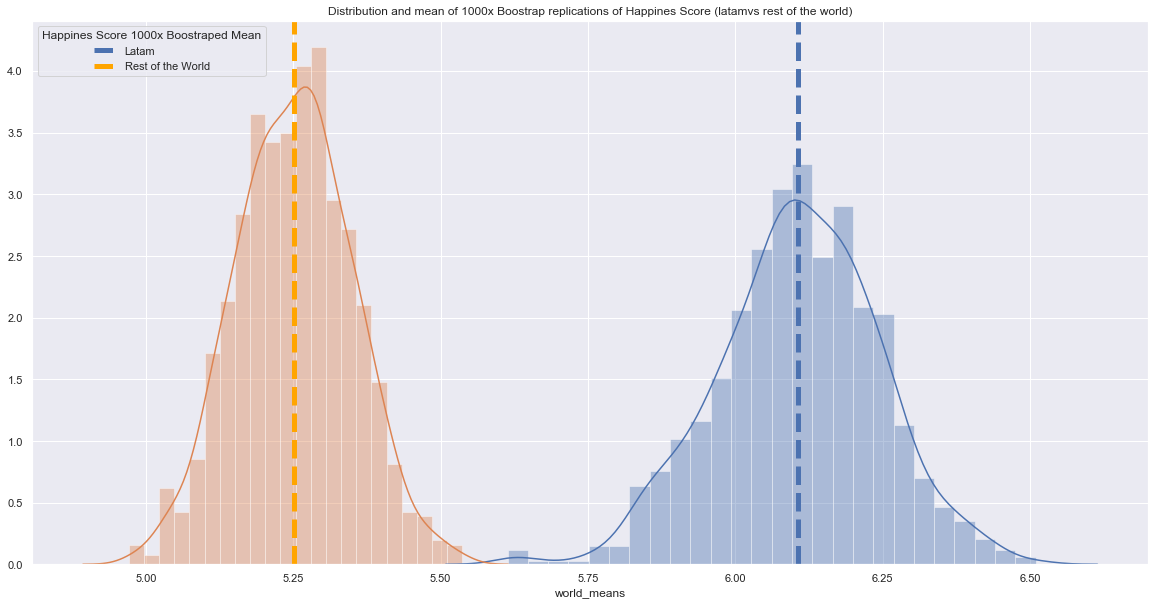

In [44]:
#create a dataframe of the 1000 means
means_df = pd.DataFrame({"latam_means":latam_means,"world_means":world_means})
#create a new feature with the differences of the mean
means_df["means_diff"]= means_df["latam_means"] - means_df["world_means"] 
#ax = means_df["latam_means"].hist(figsize=(15,7), color="b")
#ax = means_df["world_means"].hist(figsize=(15,7), color="orange",ax=ax)



plt.figure()
ax1 = sns.distplot(means_df["latam_means"])
ax2 = sns.distplot(means_df["world_means"])
plt.axvline(np.mean(means_df["latam_means"]), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(means_df["world_means"]), color='orange', linestyle='dashed', linewidth=5)
plt.legend(title='Happines Score 1000x Boostraped Mean', loc='upper left', labels=['Latam','Rest of the World'])
plt.title('Distribution and mean of 1000x Boostrap replications of Happines Score (latamvs rest of the world)');

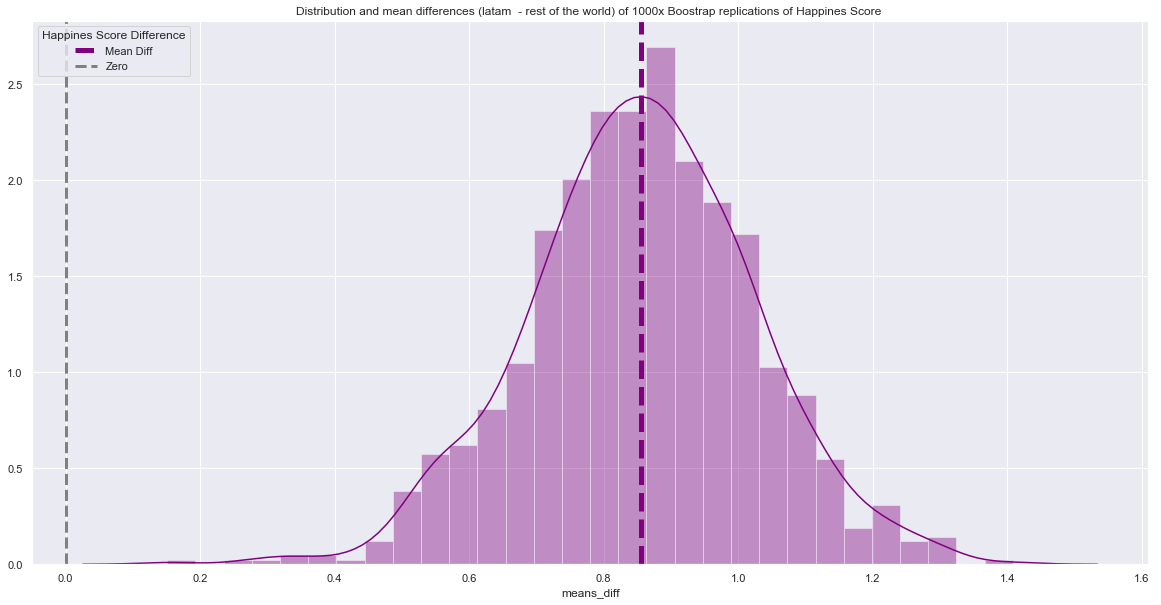

In [52]:
#now the histogram of the differences
ax1 = sns.distplot(means_df["means_diff"],color="purple")
plt.axvline(np.mean(means_df["means_diff"]), color='purple', linestyle='dashed', linewidth=5)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=3)
plt.legend(title='Happines Score Difference', loc='upper left', labels=['Mean Diff',"Zero"])
plt.title('Distribution and mean differences (latam  - rest of the world) of 1000x Boostrap replications of Happines Score ');
#as we can oberve there are not any value less than 0

In [46]:
#boostrap p-val of latam_mean being higher than world_mean is 0. thus, we're pretty sure
#number of times an observation in means diff is <0
world_big_than_latam = means_df[means_df["means_diff"] < 0].shape[0]

#empirical boostrap p-value 

world_big_than_latam / means_df.shape[0]
#boostrap p-val of latam_mean being higher than world_mean is 0. thus, we're pretty sure

#justify that your conclusion is not dependent on normality of your test statistic.



0.0

In [53]:
t_test_replicates = list()
p_val_replicates = list()
for boostrap_ite in range(1,B+1):
    #just resample  take its value and then calculate the mean
    resampled_latam = resample(hscore_latam,n_samples=N_latam)
    resampled_world = resample(hscore_world,n_samples=N_world)
    tstat,pval= ttest_ind(resampled_latam,resampled_world)
    t_test_replicates.append(tstat)
    p_val_replicates.append(pval)
    
ttest_df = pd.DataFrame({"ttest":t_test_replicates,"pval":p_val_replicates})


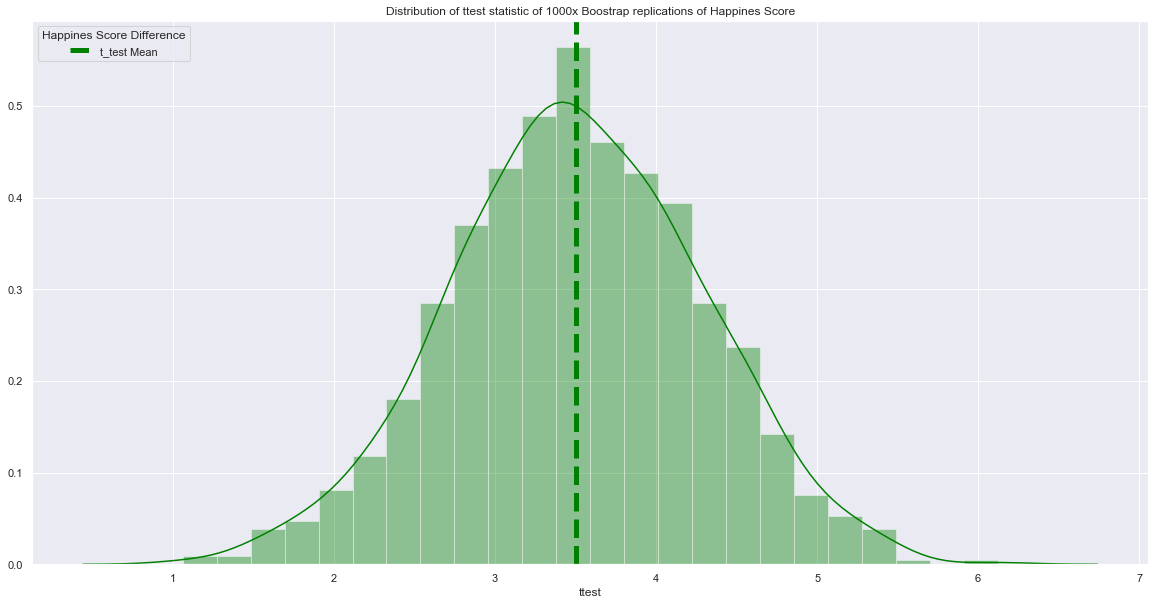

In [56]:
#now the histogram of the ttest
ax1 = sns.distplot(ttest_df["ttest"],color="green")
plt.axvline(np.mean(ttest_df["ttest"]), color='green', linestyle='dashed', linewidth=5)
plt.legend(title='Happines Score ttest resulsts', loc='upper left', labels=['t_test Mean'])
plt.title('Distribution of ttest statistic of 1000x Boostrap replications of Happines Score');


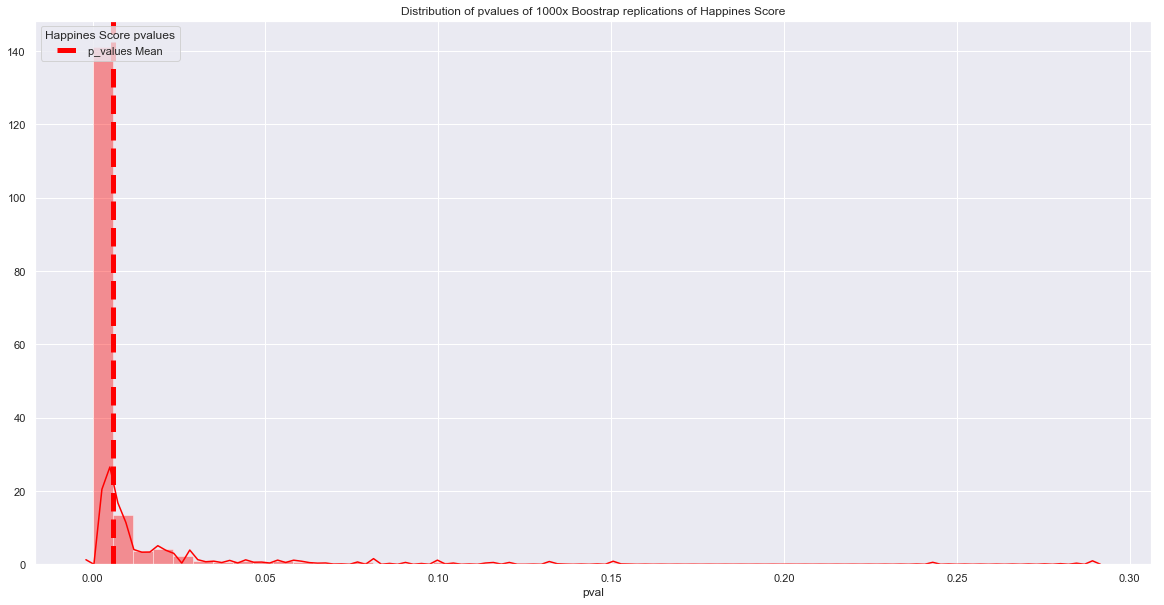

In [57]:
#now the histogram of the ttest
ax1 = sns.distplot(ttest_df["pval"],color="red")
plt.axvline(np.mean(ttest_df["pval"]), color='red', linestyle='dashed', linewidth=5)
plt.legend(title='Happines Score pvalues', loc='upper left', labels=['p_values Mean'])
plt.title('Distribution of pvalues of 1000x Boostrap replications of Happines Score');